In [4]:
!ls

ALL_CITATIONS.txt	      addons
AMIGOS-invasion_uncoupled.o   beta
BioFVM			      cell_ECM_interactions.o
BioFVM_MultiCellDS.o	      changes.md
BioFVM_agent_container.o      config
BioFVM_basic_agent.o	      core
BioFVM_matlab.o		      custom_modules
BioFVM_mesh.o		      debug.log
BioFVM_microenvironment.o     documentation-deprecated
BioFVM_solvers.o	      examples
BioFVM_utilities.o	      extracellular_matrix.o
BioFVM_vector.o		      inference.pkl
CITATION.txt		      inference2.pkl
ECM_physicell_explanation.md  inference3.pkl
Makefile		      inference4.pkl
Makefile-backup		      inference5.pkl
PhysiCell_MultiCellDS.o       inference6.pkl
PhysiCell_SVG.o		      leader_follower
PhysiCell_basic_signaling.o   licenses
PhysiCell_cell.o	      main.cpp
PhysiCell_cell_container.o    matlab
PhysiCell_constants.o	      modules
PhysiCell_custom.o	      output
PhysiCell_geometry.o	      povray
PhysiCell_pathology.o	      project
PhysiCell_phenotype.o	      protocols
PhysiCell_pugixml.o	      pugi

In [3]:
import os
os.chdir("PhysiCell")

In [4]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [7]:
! ./project

Using config file ./config/PhysiCell_settings.xml ... 
Disabling automated spring adhesions and detachments!
1
dc? 1
User parameters in XML config file: 
Bool parameters:: 
normalize_ECM_influenced_motility_vector: 0 [dimensionless]
freeze_uE_profile: 0 [dimensionless]
enable_ecm_outputs: 1 [dimensionless]

Int parameters:: 
discrete_ECM_remodeling: 1 [dimensionless]
link_anisotropy_and_bias: 0 [dimensionless]
unit_test_setup: 0 [dimensionless]
march_unit_test_setup: 0 [dimensionless]

Double parameters:: 
initial_anisotropy: 0 [dimensionless]
initial_ECM_density: 0.5 [dimensionless]
chemotactic_substrate_decay_rate: 0.1 [1/minutes]
angle_of_chemical_field_gradient: 45 [dimensionless]
ECM_dx: 20 [um]
ECM_dy: 20 [um]
ECM_dz: 20 [um]
duration_of_uE_conditioning: 10 [minutes]

String parameters:: 
cell_setup: lesion [dimensionless]
chemical_field_setup: none [dimensionless]
ECM_orientation_setup: random [dimensionless]
cell_motility_ECM_interaction_model_selector: follower chemotaxis/no f

In [8]:
import xml.etree.ElementTree as ET

def modify_xml_value(file_path, tag_path, new_value):
    tree = ET.parse(file_path)
    root = tree.getroot()
    element = root
    for tag in tag_path:
        element = element.find(tag)
        if element is None:
            print(f"Balise '{tag}' non trouvée dans le chemin spécifié.")
            return False
    element.text = str(new_value)
    tree.write(file_path, encoding="utf-8", xml_declaration=True)
    return True

In [357]:
tag_path = ["overall", "max_time"]
new_value = 1000
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [362]:
# Exemple d'appel de la fonction pour modifier l'intervalle dans <SVG>
tag_path = ["save", "SVG", "interval"]
new_value = 200
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
tag_path = ["save", "full_data", "interval"]
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [20]:
tag_path = ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_repulsion_strength"]
new_value = 90
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [26]:
tag_path = ["parallel", "omp_num_threads"]
new_value = 2
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [27]:
import time
import subprocess

start_time = time.time()

subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

end_time = time.time()

execution_time = end_time - start_time

print(execution_time)

6.09507155418396


In [368]:
import time
import subprocess
min_time = 1000
min_i = 0
for i in range(8):
    times = 0
    for j in range(4):
        tag_path = ["parallel", "omp_num_threads"]
        new_value = i+1
        modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
        print("Fichier XML modifié avec succès.")
        start_time = time.time()

        subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

        end_time = time.time()

        execution_time = end_time - start_time
        times += execution_time
    
    if times/4 < min_time:
        min_time = execution_time
        min_i = i+1
print(min_time, min_i)

Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XM

In [37]:
import numpy as np
import scipy.io
from math import sqrt
import subprocess

def get_pos(path_mat):
    mat = scipy.io.loadmat(path_mat)
    X = mat['cells'][1]  # Correction d'indexation
    Y = mat['cells'][2]  # Correction d'indexation


    return X[0], Y[0]

In [39]:
import torch
import pickle
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi import analysis as analysis

/home/aymeric/tumor-simulation/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
get_pos('/home/aymeric/tumor-simulation/PhysiCell/output/final_cells.mat')

(287.87652490657075, 0.2563408691018229)

In [95]:
def simulation_wrapper(params):
    if len(params.shape) == 1:
        n = 1
    else:
        n = params.shape[0]
    
    results = torch.zeros(n, 1, 2)

    
    for i in range(n):
        if n == 1:
            param1 = params[0]
            param2 = params[1]
            param3 = params[2]
        else:
            param1 = params[i, 0]
            param2 = params[i, 1]
            param3 = params[i, 2]
    
            
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='leader cell']", "phenotype","motility", "speed"], param1.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='leader cell']", "phenotype","motility", "persistence_time"], param2.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='leader cell']", "phenotype","motility", "migration_bias"], param3.item())

        subprocess.run(["./project"] , stdout=subprocess.DEVNULL)


        
        mat_filename = '/home/aymeric/tumor-simulation/PhysiCell/output/final_cells.mat'

        pos = get_pos(mat_filename)
        
        results[i, 0, :] = torch.tensor([pos[0], abs(pos[1])])
    return results.flatten()


In [93]:
simulation_wrapper(torch.tensor([0.2, 10, 0.95]))

1


tensor([2.8788e+02, 2.5634e-01])

In [66]:
simulation_wrapper(torch.tensor([[0.2496, 7.3062, 0.4767],
        [0.6003, 6.0195, 0.0434]]))

tensor([[0.2496, 7.3062, 0.4767],
        [0.6003, 6.0195, 0.0434]])
tensor([ 169.3943,  -34.1594,   17.8731, -132.5471])


tensor([ 169.3943,  -34.1594,   17.8731, -132.5471])

In [96]:
num_dim = 3
low = torch.tensor([0, 0, 0])

# Définir les bornes supérieures pour chaque dimension
high = torch.tensor([1, 20, 1])

# Créer le prior uniforme avec les bornes spécifiées
prior = utils.BoxUniform(low=low, high=high)

In [97]:
simulator, prior = prepare_for_sbi(simulation_wrapper, prior)

In [98]:
inference = SNPE(prior=prior)

In [99]:
theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=1000)

Running 1000 simulations.: 100%|██████████| 1000/1000 [1:35:45<00:00,  5.75s/it]


In [100]:
inference = inference.append_simulations(theta, x)

In [101]:
density_estimator = inference.train()

 Neural network successfully converged after 127 epochs.

In [102]:
with open("/home/aymeric/tumor-simulation/NN/leader/simulated_data1000.pkl", "wb") as handle:
    pickle.dump((theta, x), handle)
with open("/home/aymeric/tumor-simulation/NN/leader/density_estimator1000.pkl", "wb") as handle:
    pickle.dump(density_estimator, handle)

In [103]:
posterior = inference.build_posterior(density_estimator)

In [88]:
theta = torch.tensor([0.2, 10, 0.95])
x_o = simulation_wrapper(theta)
print(x_o)

tensor([2.8788e+02, 2.5634e-01])


In [106]:
x_o = torch.tensor([318, 80])

tensor([2.8788e+02, 2.5634e-01])


Drawing 1000000 posterior samples: 1002117it [00:07, 140059.33it/s]                            


tensor([0.2051, 7.6895, 0.7502])
tensor([287.3741,   6.8554])
tensor(21.9003)


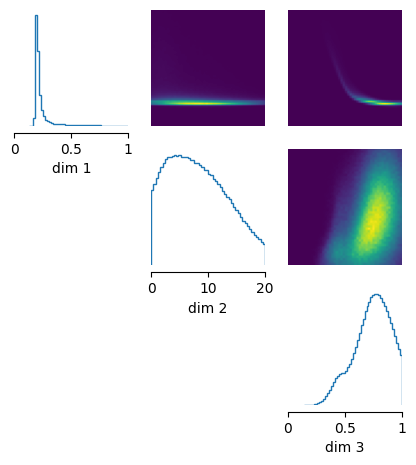

In [210]:
print(x_o)
posterior_samples = posterior.sample((1000000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[0, 1], [0, 20], [0, 1]], figsize=(5, 5)
)
print(posterior_samples.median(dim=0).values)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
print(predicted_tensor)
mse = torch.mean((x_o - predicted_tensor)**2)
print(mse)

In [110]:
import matplotlib.pyplot as plt
# Définir les plages de valeurs pour theta_0 et theta_1
speed_range = torch.linspace(0, 1, 6)
persistance_range = torch.linspace(0, 20, 6)
migration_range = torch.linspace(0, 1, 6)

mse_values = np.zeros((len(speed_range), len(persistance_range), len(migration_range)))

# Calculer le MSE pour chaque combinaison de theta_0 et theta_1
for i, t0 in enumerate(speed_range):
    for j, t1 in enumerate(persistance_range):
        for k, t2 in enumerate(migration_range):
            theta = torch.tensor([t0, t1, t2])
            x_o = simulation_wrapper(theta)
            posterior_samples = posterior.sample((100000,), x=x_o)
            predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
            mse = torch.mean((x_o - predicted_tensor)**2)
            mse_values[i, j, k] = mse.item()

Drawing 100000 posterior samples: 100120it [00:00, 116519.92it/s]
Drawing 100000 posterior samples: 100419it [00:00, 151790.88it/s]                           
Drawing 100000 posterior samples: 100857it [00:00, 148298.10it/s]                           
Drawing 100000 posterior samples: 100613it [00:00, 152566.11it/s]                           
Drawing 100000 posterior samples: 100523it [00:00, 133158.58it/s]                           
Drawing 100000 posterior samples: 100635it [00:00, 151885.62it/s]                           
Drawing 100000 posterior samples: 100405it [00:00, 144893.32it/s]                           
Drawing 100000 posterior samples: 100341it [00:00, 140506.50it/s]
Drawing 100000 posterior samples: 100422it [00:00, 120298.60it/s]
Drawing 100000 posterior samples: 100606it [00:01, 86943.22it/s]
Drawing 100000 posterior samples: 100667it [00:00, 122596.22it/s]
Drawing 100000 posterior samples: 100673it [00:00, 123387.76it/s]
Drawing 100000 posterior samples: 100581it [00:

In [164]:
print(mse_values[0, 0])
print(mse_values[1, 0])



[22.09294128 22.58947372 22.41380692 21.83868027 22.46641159 22.34038925]
[ 18.41875458 125.88711548  69.26937866  30.73922348  23.12535095
  24.44382477]


mse_values[speed][persistance][migration]

pour tracer speed en fonction persistance time à migration fixé


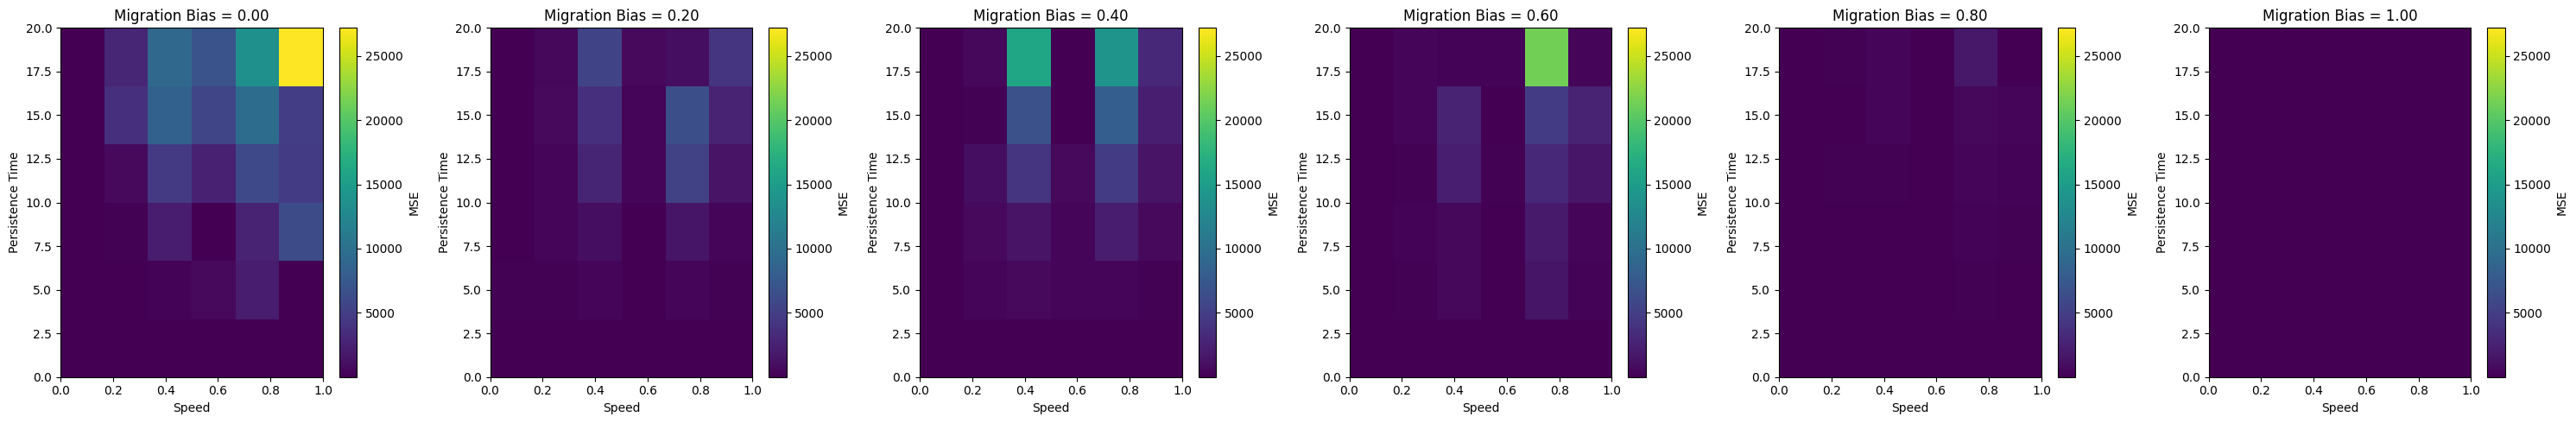

In [192]:
# Tracer des coupes bidimensionnelles
fig, axs = plt.subplots(1, len(migration_range), figsize=(30, 5))
vmin = mse_values.min()
vmax = mse_values.max()
for idx, migration_bias in enumerate(migration_range):
    ax = axs[idx]
    c = ax.imshow(mse_values[:, :, idx], extent=(0, 1, 0, 20), origin='lower', aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f'Migration Bias = {migration_bias:.2f}')
    ax.set_xlabel('Speed')
    ax.set_ylabel('Persistence Time')
    fig.colorbar(c, ax=ax, label='MSE')

plt.tight_layout()
plt.show()

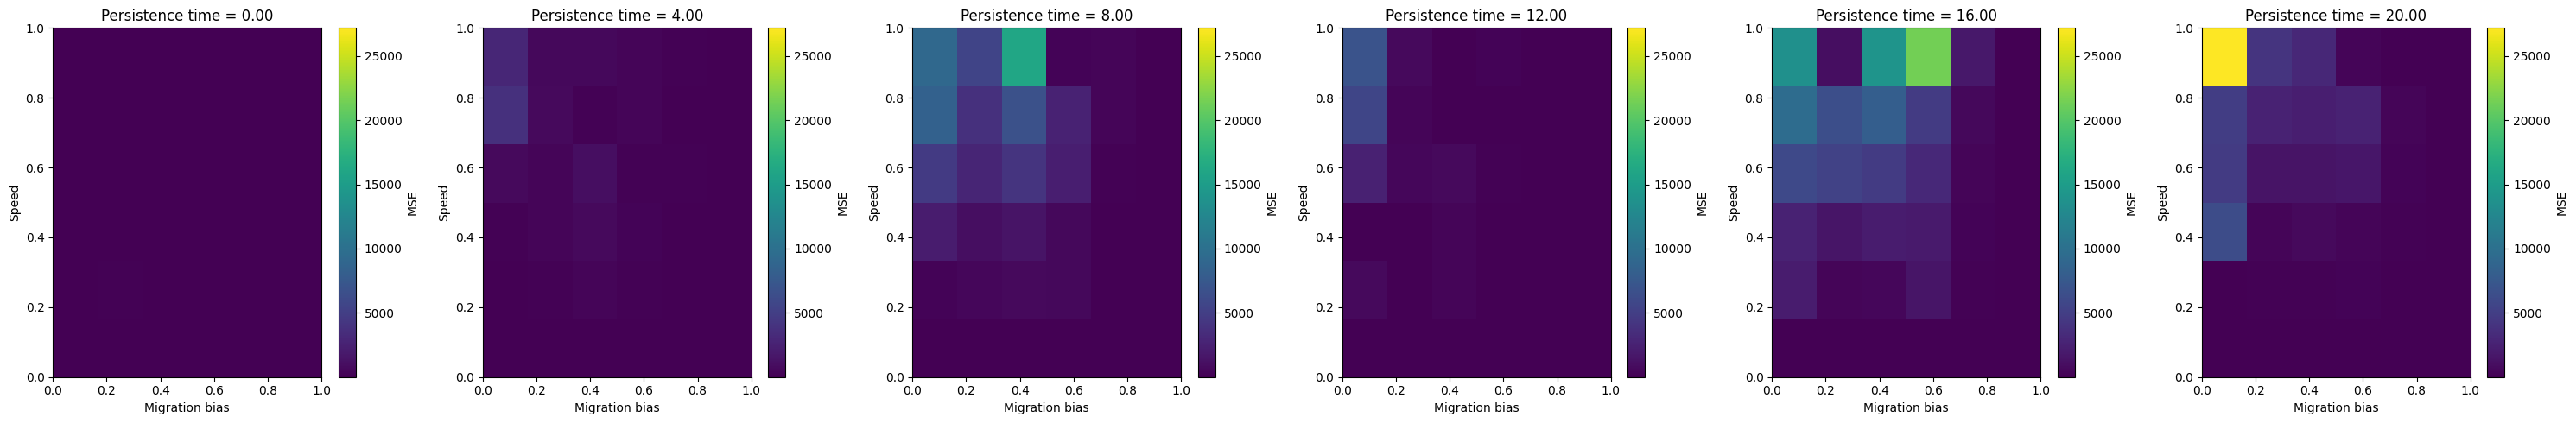

In [191]:
# Tracer des coupes bidimensionnelles
fig, axs = plt.subplots(1, len(persistance_range), figsize=(30, 5))
vmin = mse_values.min()
vmax = mse_values.max()
for idx, persistance in enumerate(persistance_range):
    ax = axs[idx]
    c = ax.imshow(mse_values[:, idx, ], extent=(0, 1, 0, 1), origin='lower', aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f'Persistence time = {persistance:.2f}')
    ax.set_xlabel('Migration bias')
    ax.set_ylabel('Speed')
    fig.colorbar(c, ax=ax, label='MSE')

plt.tight_layout()
plt.show()

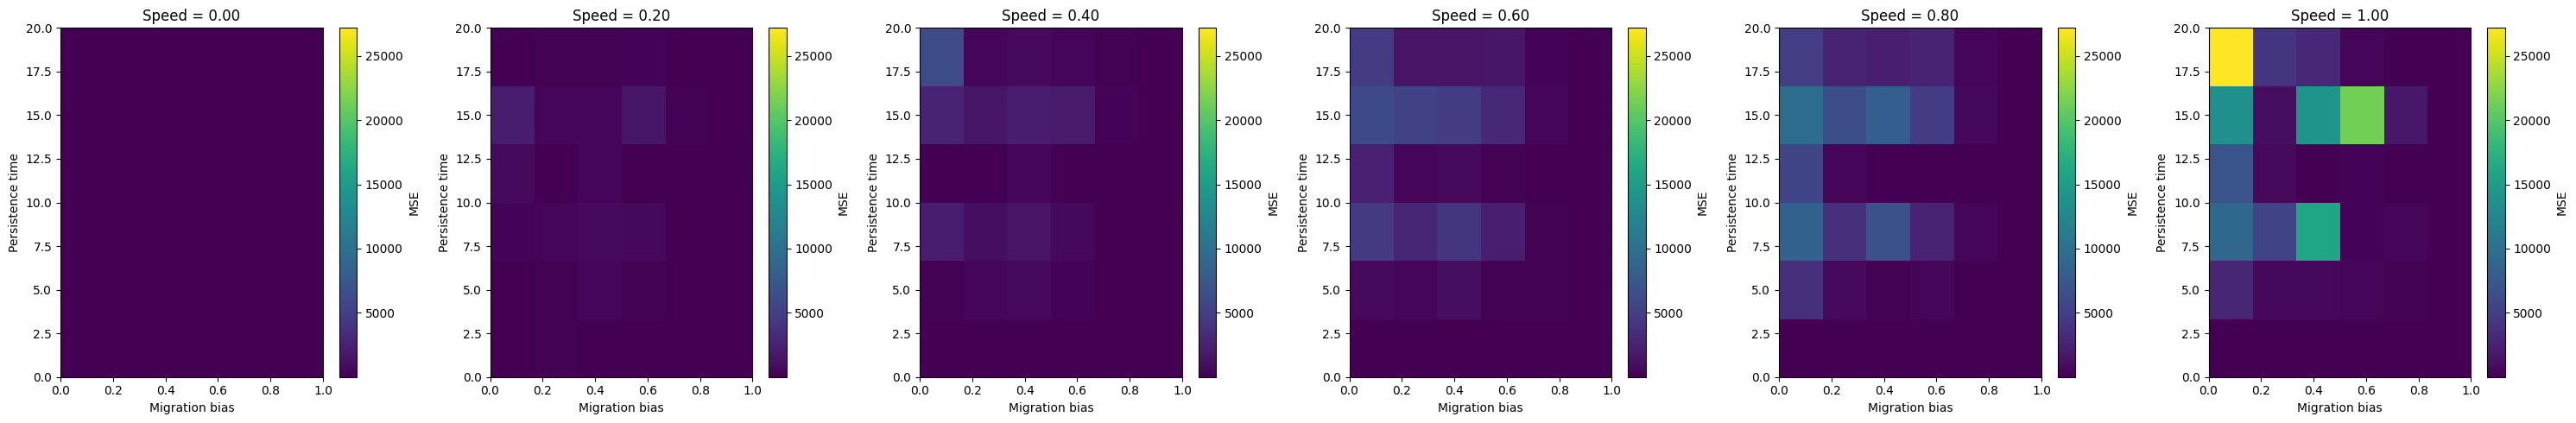

In [190]:
# Tracer des coupes bidimensionnelles
fig, axs = plt.subplots(1, len(speed_range), figsize=(30, 5))
vmin = mse_values.min()
vmax = mse_values.max()
for idx, speed in enumerate(speed_range):
    ax = axs[idx]
    c = ax.imshow(mse_values[idx], extent=(0, 1, 0, 20), origin='lower', aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f'Speed = {speed:.2f}')
    ax.set_xlabel('Migration bias')
    ax.set_ylabel('Persistence time')
    fig.colorbar(c, ax=ax, label='MSE')

plt.tight_layout()
plt.show()

In [186]:
print(mse_values[5][5][0])

27179.1328125


tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000])
tensor([ 0.,  4.,  8., 12., 16., 20.])


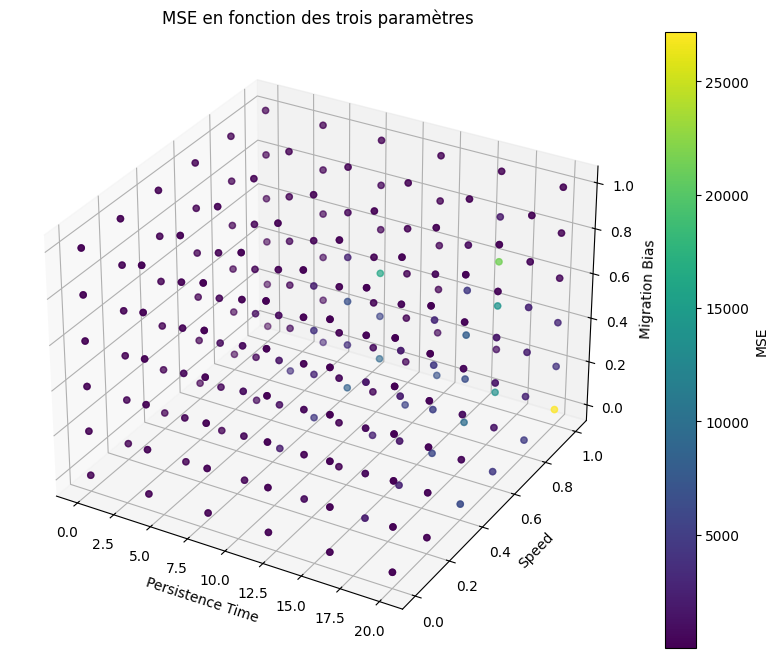

In [205]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
print(speed_range)
print(persistance_range)

X, Y, Z = np.meshgrid( persistance_range, speed_range,migration_range)
mse_values_flat = mse_values.flatten()

ax.scatter(X, Y, Z, c=mse_values_flat, cmap='viridis', marker='o')
ax.set_xlabel('Persistence Time')
ax.set_ylabel('Speed')
ax.set_zlabel('Migration Bias')
ax.set_title('MSE en fonction des trois paramètres')
plt.colorbar(ax.scatter(X, Y, Z, c=mse_values_flat, cmap='viridis', marker='o'), label='MSE')

plt.show()

In [208]:
theta = torch.tensor([0.2, 10, 0.95])
x_o = simulation_wrapper(theta)
print(x_o)


tensor([2.8788e+02, 2.5634e-01])


Drawing 100000 posterior samples: 100551it [00:00, 142774.70it/s]                           


tensor([0.2051, 7.6848, 0.7502])
tensor([287.3739,   6.8566])
[<Axes: ylabel='speed'> <Axes: xlabel='persistence_time', ylabel='speed'>
 <Axes: xlabel='migration_bias', ylabel='speed'>
 <Axes: xlabel='speed', ylabel='persistence_time'> <Axes: >
 <Axes: xlabel='migration_bias', ylabel='persistence_time'>
 <Axes: xlabel='speed', ylabel='migration_bias'>
 <Axes: xlabel='persistence_time', ylabel='migration_bias'>
 <Axes: xlabel='migration_bias'>]


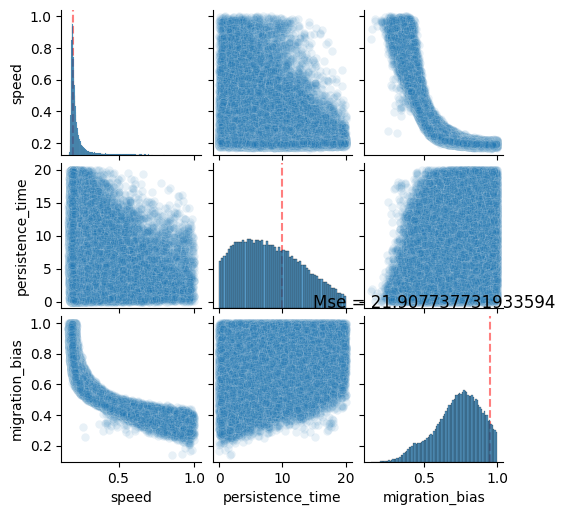

In [213]:
import seaborn as sns
import pandas as pd

# Générer des échantillons du postérieur
posterior_samples = posterior.sample((100000,), x=x_o)
# Calculer le MSE
print(posterior_samples.median(dim=0).values)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
print(predicted_tensor)
mse = torch.mean((x_o - predicted_tensor)**2)


# Convertir les échantillons en numpy array pour Seaborn
posterior_samples_np = posterior_samples.numpy()
# Créer le pairplot avec Seaborn
pairplot = sns.pairplot(
    pd.DataFrame(posterior_samples_np, columns=['speed', 'persistence_time', 'migration_bias']),
    plot_kws={'alpha': 0.1}
)
pairplot.fig.set_size_inches(5, 5)
axes = pairplot.axes.flatten()
print(axes)
axes[0].axvline(x=theta[0].item(), color='red', linestyle='--', alpha=0.5)
axes[4].axvline(x=theta[1].item(), color='red', linestyle='--', alpha=0.5)
axes[8].axvline(x=theta[2].item(), color='red', linestyle='--', alpha=0.5)
#axes[1].axhline(y=theta[0].item(), color='red', linestyle='--', alpha=0.5)
#axes[1].axvline(x=theta[1].item(), color='red', linestyle='--', alpha=0.5)
#axes[2].axhline(y=theta[1].item(), color='red', linestyle='--', alpha=0.5)
#axes[2].axvline(x=theta[0].item(), color='red', linestyle='--', alpha=0.5)
#axes[3].axvline(x=theta[1].item(), color='red', linestyle='--', alpha=0.5)

plt.title("Mse = "+str(mse.item()))
# Afficher le pairplot
plt.show()




In [298]:
theta = torch.tensor([, 9])
x_o = simulation_wrapper(theta)
print(x_o)
theta = torch.tensor([70, 5])
x_o = simulation_wrapper(theta)
print(x_o)

tensor([214.0000,  66.5600, 226.0000,  72.4457, 236.0000,  73.6708, 253.0000,
         74.9176, 268.0000,  79.1200, 278.0000,  80.6089])
tensor([214.0000,  66.5600, 240.0000,  76.0684, 274.0000,  79.7641, 300.0000,
         80.6945, 333.0000,  83.9158, 369.0000,  88.4456])


In [215]:
with open("/home/aymeric/tumor-simulation/NN/leader/simulated_data1000.pkl", "rb") as handle:
    theta, x = pickle.load(handle)
with open("/home/aymeric/tumor-simulation/NN/leader/density_estimator1000.pkl", "rb") as handle:
    density_estimator = pickle.load(handle)

num_dim = 3
low = torch.tensor([0, 0, 0])

# Définir les bornes supérieures pour chaque dimension
high = torch.tensor([1, 20, 1])

# Créer le prior uniforme avec les bornes spécifiées
prior = utils.BoxUniform(low=low, high=high)
simulator, prior = prepare_for_sbi(simulation_wrapper, prior)
inference = SNPE(prior=prior)
inference = inference.append_simulations(theta, x)
posterior = inference.build_posterior(density_estimator)

tensor([2.8788e+02, 2.5634e-01])


Drawing 100000 posterior samples: 100614it [00:00, 135383.03it/s]                           


tensor(22.0252)


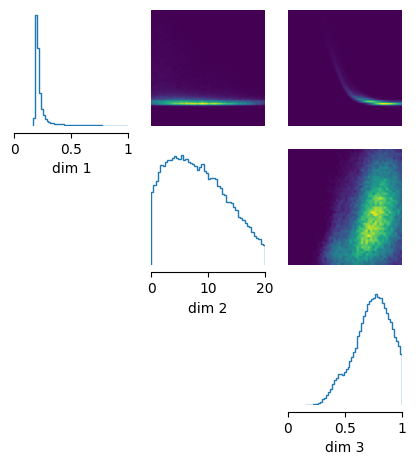

In [217]:
theta = torch.tensor([0.2, 10, 0.95])
x_o = simulation_wrapper(theta)
print(x_o)
posterior_samples = posterior.sample((100000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[0, 1], [0, 20], [0,1]], figsize=(5, 5)
)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
mse = torch.mean((x_o - predicted_tensor)**2)
print(mse)